# <font color='red'>Face_Mask_Detection_TL_MobileNetV2(Training)(Kaggle_Data)</font>
### The Data used here can be found through  <a href="https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset" target="_blank">`This Link`</a> on Kaggle Website.

## All work here is done on `CoLab`

## <font color='green'>Description of This File</font>

### The dataset contains one Zip File : `face-mask-12k-images-dataset.zip`.

### The Steps, i follow in this Notebook are:

1. Go to Kaggle Setting and download the API Key of Kaggle as `kaggle.jason` file, to Download the data direct from Kaggle to Colab.
2. Go to Colab and Upload the `kaggle.jason` file
3. Create and check the directory to save jason file in it.
4. Copy the command from Kaggle to download the data in Colab.
5. UnZip the files and then delete the zip file to speed the run.
6. Import Libraries requied to show random images of the data.
7. Create CNN model and Training then evaluate, save and test the model.


## `The Target is to predicte if the person is wearing mask or not by CNN Model`
------------------
------------------

## Upload the API Key Of Kaggle (kaggle.jason)

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikashdiwakar","key":"34523879d4269a921f1d96f57b77685e"}'}

## Create and Check the Directory

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Download the Data from Kaggle

In [3]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0
 97% 321M/330M [00:03<00:00, 116MB/s]
100% 330M/330M [00:03<00:00, 97.0MB/s]


## Check the files we downloaded

In [4]:
!ls

face-mask-12k-images-dataset.zip  kaggle.json  sample_data


## Unzip The compressed train file

In [5]:
!unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [6]:
!rm face-mask-12k-images-dataset.zip

In [7]:
!ls

'Face Mask Dataset'   kaggle.json   sample_data


## Import Libraries requied to show random images

### Define a function to load and display images

In [8]:

from os import listdir
from PIL import Image as PImage
import random
%matplotlib inline
from matplotlib import pyplot as plt
def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImgs = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImgs.append(img)

    for im in loadedImgs:
        im.show()

    plt.figure(figsize=(20,10))
    columns = 5
    for i, image in enumerate(random.sample(loadedImgs, 10)):
        plt.subplot(len(random.sample(loadedImgs, 10)) / columns + 1, columns, i + 1)
        plt.imshow(image)
    return



In [17]:
def loadImages(path):
    try:
      path = "/content/Face Mask Dataset/Train/WithoutMask"
      loadImages(path)
        # Your image loading code here
    except FileNotFoundError as e:
        print(f"File not found: {e}")

## CNN Model

## Import Libraries

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, MobileNet,MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## Load data

In [20]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = ImageDataGenerator(
	rescale=1./255,
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# Use datagen object to preprocess the data
train_generator = datagen.flow_from_directory(
    "/content/Face Mask Dataset/Train/",
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

# I using the same object for preprocess data validation
val_generator = datagen.flow_from_directory(
    "/content/Face Mask Dataset/Validation/",
    shuffle=True,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [21]:
# for plotting images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

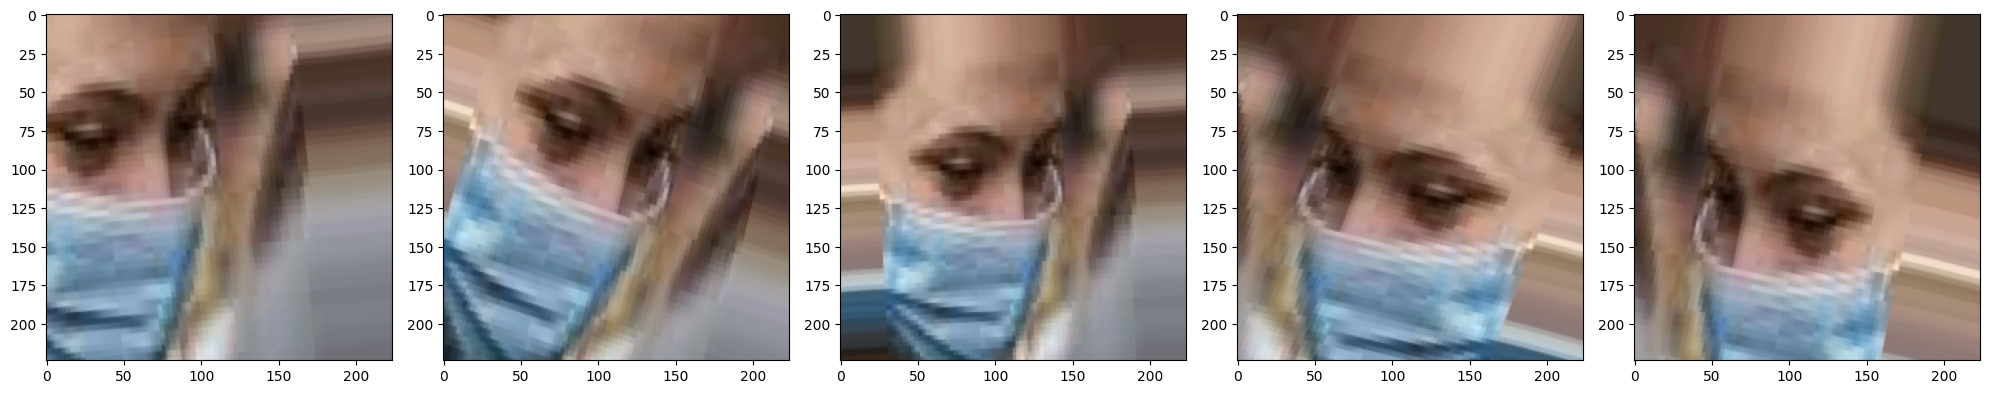

In [22]:
images = [train_generator[0][0][0] for i in range(5)]
plotImages(images)

In [23]:
for image_batch, label_batch in train_generator:
    break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 2))

In [24]:
train_generator.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [25]:
train_steps = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps)
print(val_steps)

156
12


## Define a Model (Fine Tuning with MobileNetV2 Model)

In [26]:
mobnetV2_conv = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

9406464/9406464 [==============================] - 0s 0us/step


## Freezing The `MobileNet` Layers

In [27]:
for layer in (mobnetV2_conv.layers):
    layer.trainable = False

In [28]:
mobnetV2_conv.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [29]:
model = Sequential()

# Add the MobilNetV2 convolutional base model
model.add(mobnetV2_conv)
model.add(AveragePooling2D(pool_size=(7, 7)))# average pooling gives the average of features present in a patch.
# Add new layers
model.add(Flatten(name="flatten")) #converting the data into a 1-dimensional array for inputting it to the next layer
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5)) #a technique used to prevent a model from overfitting.
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax")) # As it is a binary classification, using sigmoid is same as softmax..

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 average_pooling2d (Average  (None, 1, 1, 1280)        0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               6

In [30]:
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

In [34]:
epochs = 5

history = model.fit(train_generator,
                    steps_per_epoch=train_steps,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_steps,
                    callbacks=[checkpoint])

Epoch 1/5
156/156 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9761

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/156 [==============================] - 158s 1s/step - loss: 0.0760 - accuracy: 0.9761 - val_loss: 0.0487 - val_accuracy: 0.9818
Epoch 2/5
156/156 [==============================] - 154s 991ms/step - loss: 0.0589 - accuracy: 0.9791 - val_loss: 0.0438 - val_accuracy: 0.9844
Epoch 3/5
156/156 [==============================] - 144s 925ms/step - loss: 0.0466 - accuracy: 0.9848 - val_loss: 0.0320 - val_accuracy: 0.9922
Epoch 4/5
156/156 [==============================] - 144s 926ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0212 - val_accuracy: 0.9922
Epoch 5/5
156/156 [==============================] - 155s 995ms/step - loss: 0.0416 - accuracy: 0.9863 - val_loss: 0.0176 - val_accuracy: 0.9922


In [35]:
model.save("model.06-0.01.h5")

In [36]:
model.evaluate(val_generator, verbose=1, steps=val_steps)

12/12 [==============================] - 10s 795ms/step - loss: 0.0225 - accuracy: 0.9922


[0.022548580542206764, 0.9921875]

In [37]:
loss, acc = model.evaluate(val_generator, verbose=1, steps=val_steps)
print(" The Model, Loss:{:5.2f} and Accuracy: {:5.2f}% ".format(loss, 100*acc))

12/12 [==============================] - 9s 778ms/step - loss: 0.0275 - accuracy: 0.9909
 The Model, Loss: 0.03 and Accuracy: 99.09% 


## Analaysis the model in figures to check for overfitting.

In [38]:
import numpy as np

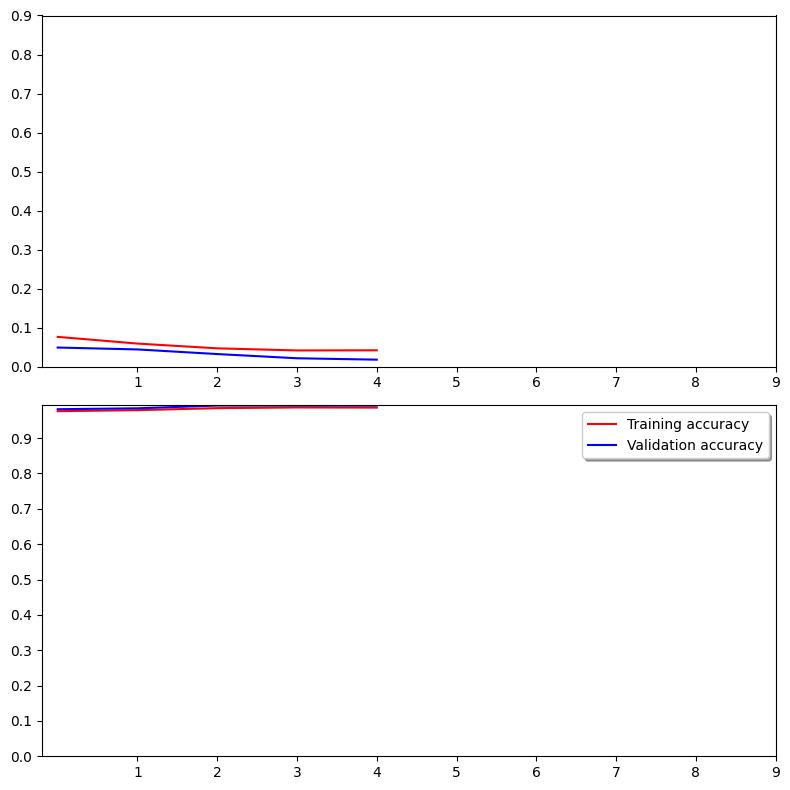

In [40]:
fig,(ax1, ax2) = plt.subplots(2, 1, figsize = (8,8))
ax1.plot(history.history["loss"], color= "red", label = "Training loss")
ax1.plot(history.history["val_loss"], color= "b", label = "Validation loss")

ax1.set_xticks(np.arange(1, epochs+5, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history["accuracy"], color = "red", label = "Training accuracy")
ax2.plot(history.history["val_accuracy"], color = "b", label = "Validation accuracy")

ax2.set_xticks(np.arange(1,epochs+5, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

legend = plt.legend(loc = "best", shadow = True)
plt.tight_layout()
plt.show()

## Load the model.h5 to Predicte New Images from any source if `WithMask` or `WithoutMask`

In [41]:
# To show the class of each breed.
train_generator.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [42]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

In [43]:
# Look at the class
!cat labels.txt

WithMask
WithoutMask

### Convert to TFLite

##### Saved the model using tf.saved_model.save and then convert the saved model to a tf lite compatible format.

In [44]:
saved_model_dir = 'fine_tuning_mobilenetv2'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

#### Download the converted model and labels

In [45]:
# Choose the best model of the training process
model.save('model.06-0.01.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')
files.download('model.06-0.01.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# Save the model and variables
!zip -r fine_tuning_mobilenetv2.zip fine_tuning_mobilenetv2
files.download("fine_tuning_mobilenetv2.zip")

  adding: fine_tuning_mobilenetv2/ (stored 0%)
  adding: fine_tuning_mobilenetv2/fingerprint.pb (stored 0%)
  adding: fine_tuning_mobilenetv2/saved_model.pb (deflated 91%)
  adding: fine_tuning_mobilenetv2/variables/ (stored 0%)
  adding: fine_tuning_mobilenetv2/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: fine_tuning_mobilenetv2/variables/variables.index (deflated 76%)
  adding: fine_tuning_mobilenetv2/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model Prediction

In [48]:
# Import the libraires
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from IPython.display import Image
import numpy as np

In [49]:
# Show the images that we will use to detect wearing mask or not?.
def Mask_Detection(url):
    tf.function(experimental_relax_shapes=True)
    image_width, image_height = 224, 224
    img = image.load_img(url, target_size=(image_width, image_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    model = load_model('model.06-0.01.h5')
    # prediction = model.predict_classes(img)
    show=Image(filename=url, width= image_width,height= image_height)
    prediction= np.argmax(model.predict(img), axis=-1)
    if prediction[0] ==1:
        print('WithoutMask')
    else:
        print('WithMask')
    return show

1/1 [==============================] - 2s 2s/step
WithMask


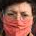

In [50]:
Mask_Detection('/content/Face Mask Dataset/Test/WithMask/1163.png')


1/1 [==============================] - 1s 838ms/step
WithMask


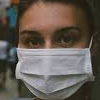

In [51]:
Mask_Detection('/content/Face Mask Dataset/Test/WithMask/153.png')

1/1 [==============================] - 1s 818ms/step
WithMask


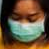

In [52]:
Mask_Detection('/content/Face Mask Dataset/Test/WithMask/1407.png')

1/1 [==============================] - 1s 790ms/step
WithMask


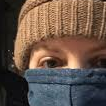

In [53]:
Mask_Detection('/content/Face Mask Dataset/Test/WithMask/1439.png')

1/1 [==============================] - 1s 1s/step
WithMask


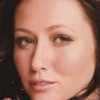

In [54]:
Mask_Detection('/content/Face Mask Dataset/Test/WithoutMask/1014.png')

1/1 [==============================] - 1s 810ms/step
WithMask


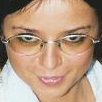

In [57]:
Mask_Detection('/content/Face Mask Dataset/Test/WithoutMask/1163.png')

1/1 [==============================] - 1s 1s/step
WithMask


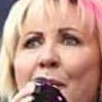

In [56]:
Mask_Detection('/content/Face Mask Dataset/Test/WithoutMask/1000.png')

____________________________